In [ ]:
import os
import pickle

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygmo as pg
# import seaborn as sns
import tellurium as te

os.chdir('..')

from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.odbm.odbm_main import ModelBuilder

: 

In [2]:
os.getcwd()

'/workspaces/ECFERS'

# Generate and read in an SBML file
### Only need to run once, but replace file names

In [ ]:
# Only need to run this the first time to make the model
model_species = pd.read_csv('src/frenda_brenda/Files/CCNs/SpeciesBaseMechanism_TXTL.csv')
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_TXTL.csv')

modelfile = 'src/frenda_brenda/Files/SBML models/240626_TXTL.txt'
myModel = ModelBuilder(model_species, model_rxns)
myModel.saveModel(modelfile)

with open('src/frenda_brenda/Files/SBML models/240626_TXTL.txt', 'r') as f:
    antimony = f.read()
    
r_TXTL  = te.loada(antimony)
r_TXTL.exportToSBML('src/frenda_brenda/Files/SBML models/240626_TXTL.sbml', current=False)

In [ ]:
# Only need to run this the first time to make the model
model_species = pd.read_csv('src/frenda_brenda/Files/CCNs/SpeciesBaseMechanism_2R.csv')
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_2R.csv')

modelfile = 'src/frenda_brenda/Files/SBML models/240611MC_double.txt'
myModel = ModelBuilder(model_species, model_rxns)
myModel.saveModel(modelfile)

with open('src/frenda_brenda/Files/SBML models/240611MC_double.txt', 'r') as f:
    antimony = f.read()
    
r_double  = te.loada(antimony)

In [ ]:
# Only need to run this the first time to make the model
model_species = pd.read_csv('src/frenda_brenda/Files/CCNs/SpeciesBaseMechanism_NOG.csv')
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_NOG.csv')

modelfile = 'src/frenda_brenda/Files/SBML models/240604MC_NOG.txt'
myModel = ModelBuilder(model_species, model_rxns)
myModel.saveModel(modelfile)

with open('src/frenda_brenda/Files/SBML models/240604MC_NOG.txt', 'r') as f:
    antimony = f.read()
    
r_NOG = te.loada(antimony)
r_NOG.exportToSBML('src/frenda_brenda/Files/SBML models/240604MC_NOG.sbml', current=False)

In [ ]:
# Only need to run this the first time to make the model
model_species = pd.read_csv('src/frenda_brenda/Files/CCNs/SpeciesBaseMechanism_rGS.csv')
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_rGS.csv')

modelfile = 'src/frenda_brenda/Files/SBML models/240604MC_rGS.txt'
myModel = ModelBuilder(model_species, model_rxns)
myModel.saveModel(modelfile)

with open('src/frenda_brenda/Files/SBML models/240604MC_rGS.txt', 'r') as f:
    antimony = f.read()
    
r_rGS  = te.loada(antimony)
r_rGS.exportToSBML('src/frenda_brenda/Files/SBML models/240604MC_rGS.sbml', current=False)

In [3]:
# Only need to run this the first time to make the model
model_species = pd.read_csv('src/frenda_brenda/Files/CCNs/SpeciesBaseMechanism_VN_HCT.csv')
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_VN_HCT.csv')

modelfile = 'src/frenda_brenda/Files/SBML models/240709MC_VN_HCT.txt'
myModel = ModelBuilder(model_species, model_rxns)
myModel.saveModel(modelfile)

with open('src/frenda_brenda/Files/SBML models/240709MC_VN_HCT.txt', 'r') as f:
    antimony = f.read()
    
r_VNHCT = te.loada(antimony)
r_VNHCT.exportToSBML('src/frenda_brenda/Files/SBML models/240709MC_VN_HCT.sbml', current=False)

In [3]:
with open('src/frenda_brenda/Files/SBML models/240618MC_metab_biosyn.txt', 'r') as f:
    antimony = f.read()
    
r_efflux  = te.loada(antimony)
#r_efflux.exportToSBML('src/frenda_brenda/Files/SBML models/240610MC_simple.sbml', current=False)

FileNotFoundError: [Errno 2] No such file or directory: 'src/frenda_brenda/Files/SBML models/240618MC_metab_biosyn.txt'

### Run this if you just need to load in an existing SBML file

In [ ]:
# This is all you need to run in order to load in the SBML file
#r_base = te.loads('src/frenda_brenda/Files/SBML models/240603MC_base.sbml')
r_biosyn = te.loads('src/frenda_brenda/Files/SBML models/240604MC_biosyn.sbml')

In [4]:
r_VN = te.loads('src/frenda_brenda/Files/SBML models/240625_VN_biosyn.sbml')

In [ ]:
r_NOG = te.loads('src/frenda_brenda/Files/SBML models/240604MC_NOG.sbml')
r_rGS = te.loads('src/frenda_brenda/Files/SBML models/240604MC_rGS.sbml')

In [ ]:
r_simple = te.loads('src/frenda_brenda/Files/SBML models/240610MC_simple.sbml')

### Code to change the dilution factor

In [ ]:
r_biosyn.setValue('init(dilution_factor)',1/200)
addedmetabs = pd.read_csv('src/frenda_brenda/adding_biosynthesis.csv')
subs_df = addedmetabs[addedmetabs['Type']=='Metabolite'].drop(columns=['Type','EC','Species'])
for sub, conc in zip(subs_df.KEGG, subs_df.Concentration):
    r_biosyn.setValue(f'[{sub}]',conc)

In [5]:
r_VN.setValue('init(dilution_factor)',1/200)
addedmetabs = pd.read_csv('src/frenda_brenda/adding_biosynthesis.csv')
subs_df = addedmetabs[addedmetabs['Type']=='Metabolite'].drop(columns=['Type','EC','Species'])
for sub, conc in zip(subs_df.KEGG, subs_df.Concentration):
    r_VN.setValue(f'[{sub}]',conc)

In [6]:
r_VNHCT.setValue('init(dilution_factor)',1/200)
addedmetabs = pd.read_csv('src/frenda_brenda/adding_biosynthesis.csv')
subs_df = addedmetabs[addedmetabs['Type']=='Metabolite'].drop(columns=['Type','EC','Species'])
for sub, conc in zip(subs_df.KEGG, subs_df.Concentration):
    r_VNHCT.setValue(f'[{sub}]',conc)

# Perturb and repeatedly simulate an SBML model
### This code is for perturbing a compound

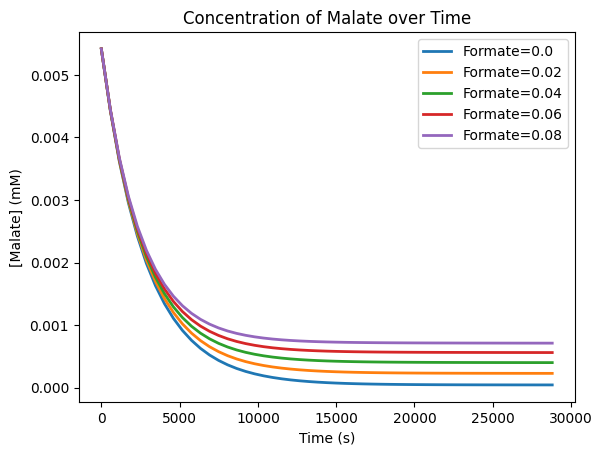

In [6]:
# Choose a substrate and iterate from start to end value (must be doubles) in increment values
for C00058 in np.arange(0.0, 0.1, 0.02):
    r_VN.reset() # reset the SBML values each loop iteration
    r_VN.C00058 = C00058 
    m = r_VN.simulate (0, 8*60*60, ['time', 'C00004']) # simulate model, this version specifies which values to take note of
    te.plotArray (m, show=False, labels=['Formate='+str(C00058)], resetColorCycle=False, xlabel="Time (s)", ylabel="[Malate] (mM)", title="Concentration of Malate over Time") # add that simulation to plot

In [ ]:
# Choose a substrate and iterate from start to end value (must be doubles) in increment values
for C00036 in np.arange(0.0, 3, 0.5):
    r_biosyn.reset() # reset the SBML values each loop iteration
    p = r_biosyn.simulate (0, 1, ['time', 'C00149'])
    r_biosyn.C00036 = C00036 # assign chosen substrate/enzyme to newly perturbed value
    m = r_biosyn.simulate (0, 10, ['time', 'C00149']) # simulate model, this version specifies which values to take note of
    te.plotArray (m, show=False, labels=['Oxaloacetate='+str(C00036)], resetColorCycle=False, xlabel="Time (s)", ylabel="[Malate] (mM)", title="Concentration of Malate over Time") # add that simulation to plot
    #te.plotArray (p, show=False, labels=['Oxaloacetate='+str(C00036)], resetColorCycle=False, xlabel="Time (s)", ylabel="[Malate] (mM)", title="Concentration of Malate over Time") # add that simulation to plot

### This code is for perturbing an enzyme

In [ ]:
# Choose an EC ID and iterate from start to end value (must be doubles) in increment values
for EC11719 in np.arange(0.0, 0.3, 0.02):
    r_biosyn.reset()
    r_biosyn.EC11719 = EC11719
    m = r_biosyn.simulate (0, 8*60*60, ['time', 'C00149'])
    te.plotArray (m, show=False, labels=['Fumarase='+str(EC11719)], resetColorCycle=False)
te.show()

### This code is for perturbing two enzymes in a matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare the figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the range for the two compounds
C00036_values = np.arange(0.0, 3, 0.5)
C00004_values = np.arange(0.0, 3, 0.5)

# Create a meshgrid for the compound values
C00036_mesh, C00004_mesh = np.meshgrid(C00036_values, C00004_values)

# Prepare to store the results
C00149_mesh = np.zeros_like(C00036_mesh)

# Iterate over both compounds
for i, C00036 in enumerate(C00036_values):
    for j, C00004 in enumerate(C00004_values):
        r_biosyn.reset() # reset the SBML values each loop iteration
        r_biosyn.C00036 = C00036 # assign chosen substrate/enzyme to newly perturbed value
        r_biosyn.C00004 = C00004 # assign second compound to newly perturbed value
        m = r_biosyn.simulate(0, 28800, 1000, ['time', 'C00149']) # simulate model
        final_value = m[-1, 1] # get the final value of C00149
        C00149_mesh[j, i] = final_value

# Plot the surface
ax.plot_surface(C00036_mesh, C00004_mesh, C00149_mesh, cmap='viridis')

# Label axes
ax.set_xlabel('C00036')
ax.set_ylabel('C00004')
ax.set_zlabel('C00149')

# Show plot
plt.show()

# Single simulation and kinetics visualization

In [ ]:
r_biosyn

In [8]:
# r_biosyn.reset()
# result_biosyn = r_biosyn.simulate(0,8*60*60)

r_VN.reset()
result_VN = r_VN.simulate(0,8*60*60)

In [9]:
r_VNHCT.reset()
result_VNHCT = r_VNHCT.simulate(0,8*60*60)

In [ ]:
from matplotlib.ticker import ScalarFormatter

In [ ]:
df_TXTL = pd.DataFrame(result_TXTL, columns=result_TXTL.colnames)

In [ ]:
columns_to_keep = [col for col in df_TXTL.columns if col.startswith('[C')] + ['time']
df_filtered = df_TXTL[columns_to_keep]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the kegg_labels.csv file
kegg_labels = pd.read_csv('kegg_labels.csv', index_col=0)

# Function to translate compound IDs to human-readable names
translate_kegg = lambda X: [kegg_labels.loc[x[1:-1]].values[0] if x[1:-1] in kegg_labels.index else x for x in X]

# Assuming your filtered DataFrame is named df_filtered

# List of compounds to plot
compounds_to_plot = ['[C06481]', '[C16636]', '[C00046]', '[C00013]', '[C00065]', '[C00020]', '[C00075]', '[C00063]', '[C00044]', '[C00002]', '[C00201]']

# Select the columns to plot
df_selected = df_filtered[['time'] + compounds_to_plot]

# Translate compound IDs to human-readable names
translated_labels = translate_kegg(compounds_to_plot)
translated_labels = ['time'] + translated_labels

# Set 'time' as the index for plotting
df_selected.set_index('time', inplace=True)

# Plot the data
plt.figure(figsize=(12, 8))
for original, translated in zip(compounds_to_plot, translated_labels[1:]):
    plt.plot(df_selected.index, df_selected[original], label=translated)

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration of Selected Compounds Over Time')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your filtered DataFrame is named df_filtered

# List of compounds to plot
compounds_to_plot = ['[C06481]', '[C16636]', '[C00046]', '[C00013]', '[C00065]', '[C00020]', '[C00075]', '[C00063]', '[C00044]', '[C00002]', '[C00201]']

# Select the columns to plot
df_selected = df_filtered[['time'] + compounds_to_plot]

# Set 'time' as the index for plotting
df_selected.set_index('time', inplace=True)

# Plot the data
plt.figure(figsize=(12, 8))
for column in compounds_to_plot:
    plt.plot(df_selected.index, df_selected[column], label=column)

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration of Selected Compounds Over Time')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
time_biosyn = result_biosyn['time']
mal_biosyn = result_biosyn['[C00149]']
nad_biosyn = result_biosyn['[C00003]']
nadh_biosyn = result_biosyn['[C00004]']
oaa_biosyn = result_biosyn['[C00036]']
pep = result_biosyn['[C00074]']
ortho = result_biosyn['[C00009]']
serine = result_biosyn['[C00065]']
pyruvate = result_biosyn['[C00022]']

plt.plot(time_biosyn, mal_biosyn, 'c', label = "Malate Biosyn")
# plt.plot(time_biosyn, serine, 'c', label = "Serine")
# plt.plot(time_biosyn, pyruvate, 'm', label = "Pyruvate")
# plt.plot(time_biosyn, nad_biosyn, 'g', label = "NAD+ Biosyn")
# plt.plot(time_biosyn, nadh_biosyn, 'm', label = "NADH Biosyn")
# plt.plot(time_biosyn, oaa_biosyn, 'g', label = "OAA Biosyn")
# plt.plot(time_biosyn, pep, 'k', label = "PEP Biosyn")
# plt.plot(time_biosyn, ortho, 'r', label = "Orthophosphate Biosyn")

plt.yscale("log")
# plt.legend()
plt.title("Kinetics of Malate in Full Model")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (mM)")
plt.gca().yaxis.set_major_formatter(ScalarFormatter()) 
plt.gca().yaxis.set_minor_formatter(ScalarFormatter()); 
plt.show()

In [ ]:
time_biosyn = result_double['time']
# mal_biosyn = result_double['[C00149]']
# nad_biosyn = result_double['[C00003]']
# nadh_biosyn = result_double['[C00004]']

oaa_biosyn = result_double['[C00036]']
pep = result_double['[C00074]']
ortho = result_double['[C00009]']
co2 = result_double['[C00011]']
water = result_double['[C00001]']


# plt.plot(time_biosyn, mal_biosyn, 'c', label = "Malate Biosyn")
# plt.plot(time_biosyn, nad_biosyn, 'g', label = "NAD+ Biosyn")
# plt.plot(time_biosyn, nadh_biosyn, 'm', label = "NADH Biosyn")
plt.plot(time_biosyn, oaa_biosyn, 'y', label = "OAA Biosyn")
plt.plot(time_biosyn, pep, 'k', label = "PEP Biosyn")
plt.plot(time_biosyn, ortho, 'r', label = "Orthophosphate Biosyn")
plt.plot(time_biosyn, co2, 'c', label = "CO2 Biosyn")
plt.plot(time_biosyn, water, 'm', label = "Water Biosyn")

plt.yscale("log")
plt.legend()
plt.title("Kinetics of R61 and R110")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (mM)")
plt.show()

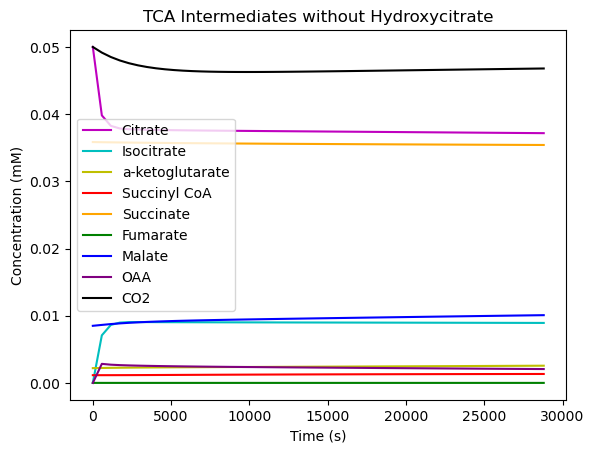

In [17]:
time_biosyn = result_VN['time']

citrate = result_VN['[C00158]']
isocitrate = result_VN['[C00311]']
aketoglutarate = result_VN['[C00026]']
succcoa = result_VN['[C00091]']
succ = result_VN['[C00042]']
fum = result_VN['[C00122]']
malate = result_VN['[C00149]']
oaa = result_VN['[C00036]']
co2 = result_VN['[C00011]']

plt.plot(time_biosyn, citrate, 'm', label = "Citrate")
plt.plot(time_biosyn, isocitrate, 'c', label = "Isocitrate")
plt.plot(time_biosyn, aketoglutarate, 'y', label = "a-ketoglutarate")
plt.plot(time_biosyn, succcoa, 'r', label = "Succinyl CoA")
plt.plot(time_biosyn, succ, 'orange', label = "Succinate")
plt.plot(time_biosyn, fum, 'g', label = "Fumarate")
plt.plot(time_biosyn, malate, 'b', label = "Malate")
plt.plot(time_biosyn, oaa, 'purple', label = "OAA")
plt.plot(time_biosyn, co2, 'black', label = "CO2")

plt.legend()
plt.title("TCA Intermediates without Hydroxycitrate")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (mM)")
plt.show()

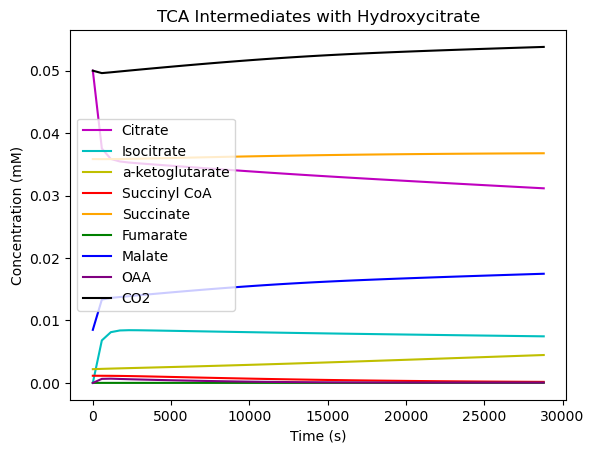

In [18]:
time_biosyn = result_VNHCT['time']

citrate = result_VNHCT['[C00158]']
isocitrate = result_VNHCT['[C00311]']
aketoglutarate = result_VNHCT['[C00026]']
succcoa = result_VNHCT['[C00091]']
succ = result_VNHCT['[C00042]']
fum = result_VNHCT['[C00122]']
malate = result_VNHCT['[C00149]']
oaa = result_VNHCT['[C00036]']
co2 = result_VNHCT['[C00011]']

plt.plot(time_biosyn, citrate, 'm', label = "Citrate")
plt.plot(time_biosyn, isocitrate, 'c', label = "Isocitrate")
plt.plot(time_biosyn, aketoglutarate, 'y', label = "a-ketoglutarate")
plt.plot(time_biosyn, succcoa, 'r', label = "Succinyl CoA")
plt.plot(time_biosyn, succ, 'orange', label = "Succinate")
plt.plot(time_biosyn, fum, 'g', label = "Fumarate")
plt.plot(time_biosyn, malate, 'b', label = "Malate")
plt.plot(time_biosyn, oaa, 'purple', label = "OAA")
plt.plot(time_biosyn, co2, 'black', label = "CO2")

plt.legend()
plt.title("TCA Intermediates with Hydroxycitrate")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (mM)")
plt.show()

# Generate heatmaps for flux through enzymes

In [ ]:
kegg_labels = pd.read_csv('kegg_labels.csv', index_col = 0)
translate_kegg = lambda X: [kegg_labels.loc[x].values[0] for x in X]

In [ ]:
# simulate an SBML model at 30, 60, 120, 240, and 480 minutes
r_VN.reset()
r01 = r_VN.simulate(0,60)
rates01 = r_VN.getReactionRates()

r_VN.reset()
r30 = r_VN.simulate(0,1800)
rates30 = r_VN.getReactionRates()

r_VN.reset()
r60 = r_VN.simulate(0,3600)
rates60 = r_VN.getReactionRates()

r_VN.reset()
r120 = r_VN.simulate(0,7200)
rates120 = r_VN.getReactionRates()

r_VN.reset()
r240 = r_VN.simulate(0,14400)
rates240 = r_VN.getReactionRates()

r_VN.reset()
r480 = r_VN.simulate(0,28800)
rates480 = r_VN.getReactionRates()

In [ ]:
# find the indices for all reactions involving Malate (C00149)
r_met = np.where(np.abs(r_VN.getFullStoichiometryMatrix()['C00002']))[0]

In [ ]:
# index the rates at certain time points to get the rates of reactions involving malate
spec_rates01 = rates01[r_met]
spec_rates30 = rates30[r_met]
spec_rates60 = rates60[r_met]
spec_rates120 = rates120[r_met]
spec_rates240 = rates240[r_met]
spec_rates480 = rates480[r_met]

In [ ]:
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_VN_Metabolism_biosyn.csv')

In [ ]:
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-1e-9, vcenter=0., vmax=1e-7)

In [ ]:
kegg_labels = pd.read_csv('kegg_labels.csv', index_col = 0)
def translate_kegg(X):
    translated = []
    for x in X:
        try:
            translated.append(kegg_labels.loc[x].values[0])
        except KeyError:
            print(f"KeyError: {x} not found in kegg_labels")
            translated.append("Unknown")
    return translated

# Combine the arrays into a 2D array
reaction_rates = np.array([spec_rates01, spec_rates30, spec_rates60, spec_rates120, spec_rates240, spec_rates480])

# Define time points in minutes
time_points = [1, 30, 60, 120, 240, 480]

# Set up the figure size and subplot adjustments
size = np.ceil(len(r_met) / 3) + 1
fig, ax = plt.subplots(figsize=(8, size))
fig.subplots_adjust(wspace=0.5)

# Create the heatmap
im = ax.imshow(reaction_rates.T, aspect='auto', cmap='PuOr', norm=colors.SymLogNorm(1e-10))

# Set axis labels
ax.set_ylabel('Reactants')
ax.set_xlabel('Time (mins)')

# Set x-axis ticks and labels
ax.set_xticks(np.arange(len(time_points)))
ax.set_xticklabels(time_points)

# Optionally, add a secondary y-axis for additional labels (if needed)
ax.set_yticks(np.arange(0,len(r_met),1), labels = ['EC '+model_rxns.loc[model_rxns['Label'] == r]['EC'].values[0] +': '+' + '.join((translate_kegg(model_rxns.loc[model_rxns['Label'] == r]['Substrates'].values[0].replace(" ",'').split(';')))) for r in np.array(r_VN.getReactionIds())[r_met]])
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(np.arange(0,len(r_met),1), labels = [' + '.join((translate_kegg(model_rxns.loc[model_rxns['Label'] == r]['Products'].values[0].replace(" ",'').split(';')))) for r in np.array(r_VN.getReactionIds())[r_met]])
ax2.set_ylabel('Products')

# # Add a colorbar on top with adjusted position
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('top', size='1%', pad='50%')  # Adjust pad to increase space between colorbar and heatmap

cbar = fig.colorbar(im, cax=cax2, orientation='horizontal', label='Rate')
cax2.xaxis.set_ticks_position("top")
cbar.ax.xaxis.set_label_position('top')  # Move colorbar label to the top

# Show the plot
plt.show()

#Required to remove some white border

# Looking into control coefficients

In [ ]:
kegg_labels = pd.read_csv('kegg_labels.csv', index_col = 0)
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_biosyn.csv')
from matplotlib.colors import LogNorm

In [ ]:
def plotCoeffs(sbml, ec, RID):
    """
    Extract KEGG compounds and calculate elasticity coefficients for a given reaction and enzyme.
    
    Parameters:
    sbml (object): The SBML model object
    ec (str): The enzyme commission number
    RID (str): The reaction ID
    
    Returns:
    dict: A dictionary with KEGG compounds as keys and their corresponding elasticity coefficients as values
    """
    #model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_2R.csv')
    
    # Extract KEGG compounds from Km and KI values
    keggs = []
    for i in model_rxns[model_rxns['EC'] == ec]['Km'].iloc[0].split('; '):
        for k in i.split(': '):
            if k.startswith('K'):
                k = k.removeprefix('Km_')
                keggs.append(k)
    for i in model_rxns[model_rxns['EC'] == ec]['KI'].iloc[0].split(';'):
        for k in i.split(': '):
            if k.startswith('C'):
                k = k.removesuffix('_KI')
                keggs.append(k)
                
    kegg = set(keggs)
    
    # Calculate elasticity coefficients
    ees = []
    for j in kegg:
        ee = sbml.getEE(RID, j)
        ees.append(ee)
    
    res = dict(zip(kegg, ees))
    return res


In [ ]:
def plotCoeffs(sbml, ec, RID):
    """
    Extract KEGG compounds and calculate elasticity coefficients for a given reaction and enzyme.
    
    Parameters:
    sbml (object): The SBML model object
    ec (str): The enzyme commission number
    RID (str): The reaction ID
    
    Returns:
    dict: A dictionary with KEGG compounds as keys and their corresponding elasticity coefficients as values
    """
    model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_2R.csv')
    
    # Extract KEGG compounds from Km values
    keggs = []
    for i in model_rxns[model_rxns['EC'] == ec]['Km'].iloc[0].split('; '):
        for k in i.split(': '):
            if k.startswith('K'):
                k = k.removeprefix('Km_')
                keggs.append(k)
                
    # Extract KEGG compounds from KI values if they exist
    if 'KI' in model_rxns.columns:
        try:
            for i in model_rxns[model_rxns['EC'] == ec]['KI'].iloc[0].split(';'):
                for k in i.split(': '):
                    if k.startswith('C'):
                        k = k.removesuffix('_KI')
                        keggs.append(k)
        except (IndexError, AttributeError):
            # Handle case where there are no KI values
            pass
                
    kegg = set(keggs)
    
    # Calculate elasticity coefficients
    ees = []
    for j in kegg:
        ee = sbml.getEE(RID, j)
        ees.append(ee)
    
    res = dict(zip(kegg, ees))
    return res

In [ ]:
def translate_kegg(X, kegg_labels):
    """
    Translate KEGG compound IDs to names using the kegg_labels DataFrame.
    
    Parameters:
    X (list): List of KEGG compound IDs
    kegg_labels (DataFrame): DataFrame containing KEGG compound IDs and their corresponding names
    
    Returns:
    list: Translated names or original IDs if not found in kegg_labels
    """
    translated = []
    for x in X:
        try:
            translated.append(kegg_labels.loc[x].values[0])
        except KeyError:
            translated.append(x)  # Use the original ID if not found
    return translated

In [ ]:
def createHeatmap(sbml, ec, RID, times, kegg_labels):
    """
    Simulate the model for given time points and create a heatmap of elasticity coefficients.
    
    Parameters:
    sbml (object): The SBML model object
    ec (str): The enzyme commission number
    RID (str): The reaction ID
    times (list): A list of time points in seconds
    kegg_labels (DataFrame): DataFrame containing KEGG compound IDs and their corresponding names
    
    Returns:
    None: Displays the heatmap
    """
    coeftime = []
    
    for time in times:
        sbml.reset()
        sbml.simulate(0, time)
        x = plotCoeffs(sbml, ec, RID)
        coeftime.append(x)
    
    timeshrs = [t / 3600 for t in times]
    df = pd.DataFrame(coeftime, index=timeshrs)
    
    # Transpose the DataFrame to have compounds as rows and time points as columns
    df_transposed = df.T
    
    # Translate compound IDs to names
    compound_ids = df_transposed.index.tolist()
    translated_names = translate_kegg(compound_ids, kegg_labels)
    df_transposed.index = translated_names
    
    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_transposed, annot=True, cmap='coolwarm', norm=LogNorm(), cbar_kws={'label': 'Elasticity Coefficient'})
    plt.xlabel('Time (Hours)')
    plt.ylabel('Compound')
    plt.title(f'Effect of Compound on Rate of {RID} over Time')
    plt.show()

In [ ]:
t = [1800, 3600, 7200, 17000, 28800]
createHeatmap(r_biosyn, '4.1.1.31', 'R110', t, kegg_labels)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import SymLogNorm

def plotCoeffs(sbml, ec, RID):
    """
    Extract KEGG compounds and calculate elasticity coefficients for a given reaction and enzyme.
    
    Parameters:
    sbml (object): The SBML model object
    ec (str): The enzyme commission number
    RID (str): The reaction ID
    
    Returns:
    dict: A dictionary with KEGG compounds as keys and their corresponding elasticity coefficients as values
    """
    model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_biosyn.csv')
    
    # Extract KEGG compounds from Km values
    keggs = []
    for i in model_rxns[model_rxns['EC'] == ec]['Km'].iloc[0].split('; '):
        for k in i.split(': '):
            if k.startswith('K'):
                k = k.removeprefix('Km_')
                keggs.append(k)
                
    # Extract KEGG compounds from KI values if they exist
    if 'KI' in model_rxns.columns:
        try:
            for i in model_rxns[model_rxns['EC'] == ec]['KI'].iloc[0].split(';'):
                for k in i.split(': '):
                    if k.startswith('C'):
                        k = k.removesuffix('_KI')
                        keggs.append(k)
        except (IndexError, AttributeError):
            # Handle case where there are no KI values
            pass
                
    kegg = set(keggs)
    
    # Calculate elasticity coefficients
    ees = []
    for j in kegg:
        ee = sbml.getEE(RID, j)
        ees.append(ee)
    
    res = dict(zip(kegg, ees))
    return res

def translate_kegg(X, kegg_labels):
    """
    Translate KEGG compound IDs to names using the kegg_labels DataFrame.
    
    Parameters:
    X (list): List of KEGG compound IDs
    kegg_labels (DataFrame): DataFrame containing KEGG compound IDs and their corresponding names
    
    Returns:
    list: Translated names or original IDs if not found in kegg_labels
    """
    translated = []
    for x in X:
        try:
            translated.append(kegg_labels.loc[x].values[0])
        except KeyError:
            translated.append(x)  # Use the original ID if not found
    return translated

def createHeatmap(sbml, ec, RID, times, kegg_labels):
    """
    Simulate the model for given time points and create a heatmap of elasticity coefficients.
    
    Parameters:
    sbml (object): The SBML model object
    ec (str): The enzyme commission number
    RID (str): The reaction ID
    times (list): A list of time points in seconds
    kegg_labels (DataFrame): DataFrame containing KEGG compound IDs and their corresponding names
    
    Returns:
    None: Displays the heatmap
    """
    coeftime = []
    
    for time in times:
        sbml.reset()
        sbml.simulate(0, time)
        x = plotCoeffs(sbml, ec, RID)
        coeftime.append(x)
    
    timeshrs = [t / 3600 for t in times]
    df = pd.DataFrame(coeftime, index=timeshrs)
    
    # Transpose the DataFrame to have compounds as rows and time points as columns
    df_transposed = df.T
    
    # Translate compound IDs to names
    compound_ids = df_transposed.index.tolist()
    translated_names = translate_kegg(compound_ids, kegg_labels)
    df_transposed.index = translated_names
    
    # Plotting the heatmap with symmetrical log scale for color mapping
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_transposed, annot=True, cmap='coolwarm', norm=SymLogNorm(linthresh=1e-2, linscale=1, vmin=-1e2, vmax=1e2), cbar_kws={'label': 'Elasticity Coefficient'})
    plt.xlabel('Time (Hours)')
    plt.ylabel('Compound')
    plt.title(f'Effect of Compound on Rate of {RID} over Time')
    plt.show()

# Example usage:
# Assuming `r_biosyn` is your SBML model object and `kegg_labels` is the DataFrame containing KEGG labels
# kegg_labels = pd.read_csv('kegg_labels.csv', index_col=0)
# createHeatmap(r_biosyn, '1.1.1.37', 'R61', [1800, 3600, 7200, 14400, 28800], kegg_labels)


In [ ]:
t = [1, 240, 480, 960, 1920]
createHeatmap(r_biosyn, '1.1.1.37', 'R61', t, kegg_labels)

# Preparing for a DBTL cycle

In [ ]:
addedmetabs = pd.read_csv('src/frenda_brenda/adding_biosynthesis.csv')

In [ ]:
subs_df = addedmetabs[addedmetabs['Type']=='Metabolite'].drop(columns=['Type','EC','Species'])
enz_df = addedmetabs[addedmetabs['Type']=='Enzyme'].drop(columns=['Type','KEGG','Species'])

In [ ]:
import numpy as np
import pandas as pd
import itertools
import tellurium as te

# Define the perturbation factors: 1/10 and 10x the original value
perturbation_factors = [1/10000000000000, 1]

# Create all combinations of perturbed values for the enzymes
combinations = list(itertools.product(perturbation_factors, repeat=len(enz_df)))

# Store the results
results = []

# Perform simulations for each combination of enzyme concentrations
for combination in combinations:
    # Reset the model
    r_biosyn.reset()
    
    # Set the enzyme concentrations for this combination
    initial_values = {}
    for i, (factor, (identifier, concentration)) in enumerate(zip(combination, enz_df.itertuples(index=False))):
        new_concentration = concentration * factor
        formatted_identifier = f'p_EC{identifier.replace(".", "")}'
        setattr(r_biosyn, formatted_identifier, new_concentration)  # set enzyme concentration
        initial_values[identifier] = new_concentration
    
    # Run the simulation
    r_biosyn.simulate(0, 8*60*60)
    
    # Get the final value of C00149 (malate)
    final_C00149 = r_biosyn.C00149
    
    # Store the result
    initial_values['final_C00149'] = final_C00149
    results.append(initial_values)

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Display or save the results
print(results_df)
# You can save the results_df to a CSV file if needed
# results_df.to_csv('simulation_results.csv', index=False)

In [ ]:
pd.options.display.float_format = "{:,.4f}".format

In [ ]:
results_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Bar Plot of final malate concentrations
results_df_sorted = results_df.sort_values(by='final_C00149')
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df_sorted.index, y='final_C00149', data=results_df_sorted, palette='viridis')
plt.title('Bar Plot of Final Malate Concentrations')
plt.xlabel('Simulation Index')
plt.ylabel('Final Malate Concentration (C00149)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Create the reformatted DataFrame
reformatted_data = []

# Process each row in results_df
for index, row in results_df.iterrows():
    # Create the Line Name
    perturbation_labels = ''.join(['1' if row[enz] > 1 else '0' for enz in results_df.columns[:-1]])
    line_name = 'Sample' + perturbation_labels
    
    # Add the malate concentration
    reformatted_data.append({
        'Line Name': line_name,
        'Type': 'Malate',
        '24': row['final_C00149']
    })
    
    # Add the individual enzyme concentrations
    for enzyme in results_df.columns[:-1]:  # Exclude the 'final_C00149' column
        reformatted_data.append({
            'Line Name': line_name,
            'Type': enzyme,
            '24': row[enzyme]
        })

# Convert to DataFrame
reformatted_df = pd.DataFrame(reformatted_data)

# Display the reformatted DataFrame
print(reformatted_df)
# You can save the reformatted_df to a CSV file if needed
# reformatted_df.to_csv('reformatted_results.csv', index=False)

In [ ]:
reformatted_df

# Perturbing kinetic parameters for one reaction and plotting simulation results

In [ ]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
model_rxns = pd.read_csv('src/frenda_brenda/Files/CCNs/Reaction_biosyn.csv')

In [ ]:
# find the indices for all reactions involving Malate (C00149)
r_met = np.where(np.abs(r_biosyn.getFullStoichiometryMatrix()['C00149']))[0]
np.array(r_biosyn.getReactionIds())[r_met]

In [ ]:
def details(label):
    filt = model_rxns[model_rxns['Label'] == label]
    ec = filt['EC'].iloc[0]
    ecform = re.sub(r'[^\w\s]','',ec)
    params = []
    
    km = filt['Km']
    for kms in km.iloc[0].split('; '):
        for vals in kms.split(': '):
            if vals.startswith('Km'):
                params.append(f'{vals}_EC{ecform}')
                
    kcat = filt['Kcat']
    for kcats in kcat.iloc[0].split('; '):
        for vals in kcats.split(': '):
            if vals.startswith('Kcat'):
                params.append(f'{vals}_{label}')
                
    ki = filt['KI']
    for kis in ki.iloc[0].split(';'):
        for vals in kis.split(': '):
            if vals.startswith('C'):
                fval = re.sub('_KI','','C00209_KI')
                params.append(f'Ki_{fval}_EC{ecform}')
    
    return(params)

In [ ]:
fractions = [1 / i for i in range(10, 0, -1)]
integers = list(range(1, 11))
combined = fractions + integers

In [ ]:
def simplotparams(param):    
    # Initialize an empty list to store results for each iteration
    results_list = []
    
    # Iterate through the combined list of values
    for num in combined:
        # Reset the model for each iteration
        r_biosyn.reset()

        # Modify the enzyme concentration
        r_biosyn.param = r_biosyn.param * num

        # Simulate the model
        r_biosyn.simulate(0, 8*60*60, ['time', 'C00149'])

        # Get the final value of C00149 (malate)
        final_C00149 = r_biosyn.C00149

        # Store the result for this iteration
        results_list.append({'kinetic parameter value': r_biosyn.param, 'final malate concentration': final_C00149})

    # Convert the list of results to a DataFrame for easy analysis
    results_df = pd.DataFrame(results_list)
    sns.scatterplot(data=results_df, x="final malate concentration", y="kinetic parameter value").set(title=f'{param}')
    plt.show()

In [ ]:
simplotparams(details('R61')[0])

In [ ]:
for p in details('R61'):
    simplotparams(p)

# Finding and detailing metrics for a perturbation condition

In [21]:
import pandas as pd

def calc_metrics(model):
    # make a dataframe of the simulation results
    df = pd.DataFrame(model, columns=model.colnames)
    columns_to_keep = ['time'] + [col for col in df.columns if col.startswith('[C')]
    df_filtered = df[columns_to_keep]
    df = df_filtered
    
    # create a list to store each row as a dictionary
    rows = []
    
    for compound in df.columns[:2]:
        
        if compound == 'time':
            continue
            
        # calculate the initial concentration
        initialconc = df[compound].iloc[0]

        # calculate the final concentration
        finalconc = df[compound].iloc[-1]

        # calculates change in malate from start to finish
        deltatot = finalconc - initialconc

        # finds the minimum concentration and time at minima
        minconc = min(df[compound])
        mintime = df['time'][df[compound].idxmin()]

        # finds the maximum concentration and time at maximum
        maxconc = max(df[compound])
        maxtime = df['time'][df[compound].idxmax()]

        # calculates change in malate from start to max
        deltamax = maxconc - initialconc

        # calculates half of produced malate
        halfmax = deltamax / 2

        # finds the concentration and time closest to half max
        df_closest = df.iloc[(df[compound] - (initialconc + halfmax)).abs().argsort()[:1]]
        halftime = df_closest['time'].iloc[0]
        halfconc = df_closest[compound].iloc[0]

        # append the calculated metrics to the list of rows
        rows.append({'Species': compound,
                     'Final Concentration': finalconc,
                     'Min Conc': minconc,
                     'Max Conc': maxconc,
                     'Min Time': mintime,
                     'Max Time': maxtime,
                     'Total Production': deltatot,
                     'Production to Max': deltamax,
                     'Half Max Time': halftime,
                     'Half Max Conc': halfconc})
    
    # create a dataframe from the list of rows
    df_final = pd.DataFrame(rows)
    
    return df_final

In [23]:
results = r_VN.simulate(8*60*60)

In [24]:
calc_metrics(results)

,Species,Final Concentration,Min Conc,Max Conc,Min Time,Max Time,Total Production,Production to Max,Half Max Time,Half Max Conc
0,[C00079],0.000005,0.000005,0.000005,28800.0,28800.0,0.0,0.0,28800.0,0.000005


### Now, we want to be able to perturb every single enzyme concentration (and metabolite?) in the model and run these calculations for each variation of the model

In [5]:
import numpy as np
import pandas as pd
import itertools
import tellurium as te

In [6]:
# We will actually access the IDs using the keys of the model like so
IDs = r_VN.getFloatingSpeciesIds()

# Define the perturbation factors: 1/10 and 10x the original value
perturbation_factors = [1/10, 1/5, 1/2, 1, 2, 5, 10]

### Now that we have the metrics in a dataframe and the identifiers to help us track the changes in the input of the model, we want a way to calculate coefficients of importance for each parameter

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Pivot the results_df to have metrics for each compound in separate columns
pivoted_df = results_df.pivot(index='Perturbation ID', columns='Species')

# Flatten the column multi-index
pivoted_df.columns = ['_'.join(col).strip() for col in pivoted_df.columns.values]

# Merge the pivoted results with concentration data
merged_df = pd.merge(pivoted_df, concentration_df, on='Perturbation ID')

# List of compounds
compounds = ['C00079', 'C00185']

# List of metrics
metrics = ['Final Concentration', 'Min Conc', 'Max Conc', 'Min Time', 'Max Time', 
           'Total Production', 'Production to Max', 'Half Max Conc', 'Half Max Time']

# Initialize a dataframe to store regression coefficients
regression_coefficients = pd.DataFrame(columns=['Metric', 'Target Compound'] + compounds)

# Perform regression analysis for each metric of each compound
for compound in compounds:
    for metric in metrics:
        target_metric = f'{metric}_{compound}'
        X = merged_df[compounds]
        y = merged_df[target_metric]
        X = sm.add_constant(X)  # Add a constant term for the intercept
        
        # Fit the regression model
        model = sm.OLS(y, X).fit()
        
        # Extract the coefficients
        coefficients = model.params
        
        # Append to the regression coefficients dataframe
        regression_coefficients = regression_coefficients.append({
            'Metric': metric,
            'Target Compound': compound,
            **coefficients
        }, ignore_index=True)

In [ ]:
merged_df[]

### Add stuff to the pygmo problems code for parallelization

In [7]:
pvals = {p:r_VN[p] for p in r_VN.getGlobalParameterIds() if 'p_EC' in p}
plabels = list(pvals.keys())

metabolites = [s for s in r_VN.getFloatingSpeciesIds() if 'EC' not in s]
rstr = r_VN.getSBML()
vlabels = [v for v in [(rstr[rstr.find('<initialAssignment symbol="'+s+'">')+150:rstr.find('<initialAssignment symbol="'+s+'">')+150+len(s)]).split(' ')[0] for s in metabolites] if 'v' in v]

parameter_labels = plabels + vlabels

In [10]:
# Example list of IDs and perturbation factors
IDs = parameter_labels[:2]
perturbation_factors = [1/10, 10]

# Initialize empty dataframe to store results
concentration_df = pd.DataFrame(columns=['Perturbation ID'] + IDs)

# Generate all combinations of perturbation factors for the IDs
perturbation_combinations = list(itertools.product(perturbation_factors, repeat=len(IDs)))

perturbation_id = 1
for combination in perturbation_combinations:
    # Track the concentration values for this perturbation
    concentration_values = [perturbation_id]
    for i, ID in enumerate(IDs):
        initial_concentration = r_VN.getValue(ID)
        perturbed_concentration = initial_concentration * combination[i]
        concentration_values.append(perturbed_concentration)
    concentration_df.loc[len(concentration_df)] = concentration_values
    perturbation_id += 1

In [11]:
concentration_df

,Perturbation ID,p_EC4213,p_EC2776
0,1.0,0.1,0.1
1,2.0,0.1,10.0
2,3.0,10.0,0.1
3,4.0,10.0,10.0


In [ ]:
SBML_Barebone_Multi_Fly(model:list, parameter_labels, timepoint, variables:list)

In [ ]:
class SBML_Barebone_Multi_Fly:
    class ModelStuff:
        def __init__(self, model, parameter_labels, variables):
            r = te.loadSBMLModel(model)
            self.species_labels = np.array(r.getFullStoichiometryMatrix().rownames)
            self.r_parameter_labels = np.array(r.getGlobalParameterIds())
            self.parameter_order = np.int32(np.squeeze(np.array([np.where(p == self.r_parameter_labels) for p in parameter_labels if p in self.r_parameter_labels])))
            self.parameter_present = [p in self.r_parameter_labels for p in parameter_labels]
            self.variable_order = {sample:np.int32(np.squeeze(np.array([np.where(p == self.r_parameter_labels) for p in var.keys() if p in self.r_parameter_labels]))) for sample,var in variables.items()}
            self.variable_present = {sample:[p in self.r_parameter_labels for p in var.keys()] for sample,var in variables.items()}
            del r

    def __init__(self, model:list, parameter_labels, timepoint, variables:list):
        self.model = model # now a list of models
        self.timepoint = timepoint
        self.parameter_labels = parameter_labels # all parameters across all models, only the ones that are going to be fitted
        self.variables = variables # list of dict of labels and values. use this for species
        self.cvode_timepoints = 1000
        self.model_stuff = [self.ModelStuff(m, self.parameter_labels, var) for m,var in zip(self.model, self.variables)]

    def _setup_rr(self): # run on engine
        from roadrunner import Config, RoadRunner, Logger
        Logger.disableLogging()
        Config.setValue(Config.ROADRUNNER_DISABLE_PYTHON_DYNAMIC_PROPERTIES, True)
        Config.setValue(Config.LOADSBMLOPTIONS_RECOMPILE, False) 
        Config.setValue(Config.LLJIT_OPTIMIZATION_LEVEL, 4)
        Config.setValue(Config.LLVM_SYMBOL_CACHE, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_GVN, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_CFG_SIMPLIFICATION, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_INSTRUCTION_COMBINING, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_DEAD_INST_ELIMINATION, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_DEAD_CODE_ELIMINATION, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_INSTRUCTION_SIMPLIFIER, True)
        Config.setValue(Config.SIMULATEOPTIONS_COPY_RESULT, True)
        self.r = []
        for m in self.model:
            r = te.loadSBMLModel(m)
            r.integrator.absolute_tolerance = 1e-8
            r.integrator.relative_tolerance = 1e-8
            r.integrator.maximum_num_steps = 2000
            self.r.append(r)
            
    def _simulate(self, x):
        from roadrunner import Config, RoadRunner, Logger
        Logger.disableLogging()
        Config.setValue(Config.ROADRUNNER_DISABLE_PYTHON_DYNAMIC_PROPERTIES, True)
        Config.setValue(Config.LOADSBMLOPTIONS_RECOMPILE, False) 
        Config.setValue(Config.LLJIT_OPTIMIZATION_LEVEL, 4)
        Config.setValue(Config.LLVM_SYMBOL_CACHE, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_GVN, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_CFG_SIMPLIFICATION, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_INSTRUCTION_COMBINING, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_DEAD_INST_ELIMINATION, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_DEAD_CODE_ELIMINATION, True)
        Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_INSTRUCTION_SIMPLIFIER, True)
        Config.setValue(Config.SIMULATEOPTIONS_COPY_RESULT, True)

        all_results = []
        for r,ms,v in zip(self.r, self.model_stuff, self.variables):

            # this sets the "parameters"
            r.model.setGlobalParameterValues([*ms.parameter_order, *ms.variable_order], [*x[ms.parameter_present], *np.array(list(v.values()))[ms.variable_present]])
            r.reset()

            # this sets species inital concentrations
            for label, value in v.items():
                if not np.isnan(value):
                    if label in ms.species_labels:
                        r.setValue('['+label+']', value)
            try:
                results = r.simulate(0,self.timepoint,self.cvode_timepoints)
            except Exception as e:
                print(e)
                # break # stop if any fail
            r.resetToOrigin()
            all_results.append(results)
        del Config, RoadRunner, Logger, results
        return all_results

    def _calculate_metrics(self, x): # x is an array of parameter values, variables is a list of dictionaries
        all_results =  self._simulate(x) # this returns a list of results

        all_metrics = []
        for result in all_results:
            # result is a numpy array 
            # make a dataframe of the simulation results
            df_un = pd.DataFrame(result, columns=result.colnames)
            columns_to_keep = ['time'] + [col for col in df_un.columns if col.startswith('[C')]
            df = df_un[columns_to_keep]
            
            # create a list to store each row as a dictionary
            rows = []
            
            for compound in df.columns:
                if compound == 'time':
                    continue
                # calculate the initial concentration
                initialconc = df[compound].iloc[0]
                # calculate the final concentration
                finalconc = df[compound].iloc[-1]
                # calculates change in malate from start to finish
                deltatot = finalconc - initialconc
                # finds the minimum concentration and time at minima
                minconc = min(df[compound])
                mintime = df['time'][df[compound].idxmin()]
                # finds the maximum concentration and time at maximum
                maxconc = max(df[compound])
                maxtime = df['time'][df[compound].idxmax()]
                # calculates change in malate from start to max
                deltamax = maxconc - initialconc
                # calculates half of produced malate
                halfmax = deltamax / 2
                # finds the concentration and time closest to half max
                df_closest = df.iloc[(df[compound] - (initialconc + halfmax)).abs().argsort()[:1]]
                halftime = df_closest['time'].iloc[0]
                halfconc = df_closest[compound].iloc[0]
                # append the calculated metrics to the list of rows
                rows.append({'Species': compound,
                             'Final Concentration': finalconc,
                             'Min Conc': minconc,
                             'Max Conc': maxconc,
                             'Min Time': mintime,
                             'Max Time': maxtime,
                             'Total Production': deltatot,
                             'Production to Max': deltamax,
                             'Half Max Time': halftime,
                             'Half Max Conc': halfconc})

        # create a dataframe from the list of rows
        df_final = pd.DataFrame(rows)
            
        all_metrics.append(df_final)

        return all_metrics

    # gotta keep these around but we dont use them
    def fitness(self, x):
        return [1]

    def get_bounds(self):
        return ([0 for i in self.parameter_labels], [1 for i in self.parameter_labels])
    